In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
#Loading the Dataset
df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


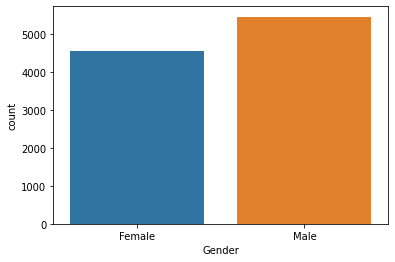

In [3]:
#Univariate Analysis
sns.countplot(df['Gender'])

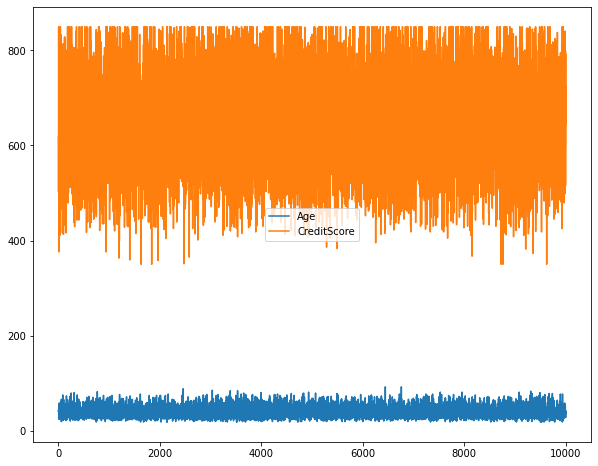

In [4]:
#Bivariate Visualization
plt.figure(figsize=(10,8))
df.Age.plot()
df.CreditScore.plot()
plt.legend(['Age','CreditScore'])

Text(0, 0.5, 'Y-axis')

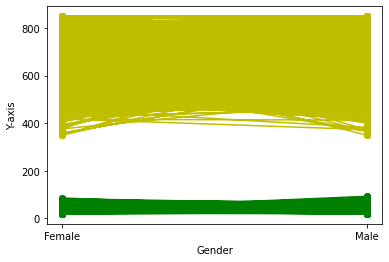

In [5]:
#Multivariate Analysis
plt.plot(df['Gender'],df['Age'],'g',marker='o')
plt.plot(df['Gender'],df['CreditScore'],'y',marker='o')
plt.xlabel('Gender')
plt.ylabel('Y-axis')

In [8]:
#Performing Descriptive Statistics on Dataset
df.CreditScore.median(),df.Geography.mode()

(652.0, 0    France
 dtype: object)

In [9]:
df.Age.mean()

38.9218

In [11]:
#Handle the missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


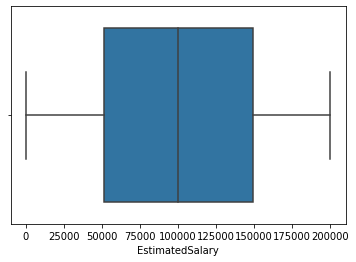

In [12]:
#Finding and replacing outliers
sns.boxplot(df.EstimatedSalary)

In [13]:
q1=df.EstimatedSalary.quantile(0.25)
q3=df.EstimatedSalary.quantile(0.75)
print(q1)
print(q3)

51002.11
149388.2475


In [14]:
iqr=q3-q1
iqr

98386.1375

In [15]:
ll=q1-1.5*iqr
ll

-96577.09624999999

In [16]:
df.EstimatedSalary.median()

100193.915

In [17]:
df['EstimatedSalary']=np.where(df['EstimatedSalary']<ll,652.0,df['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


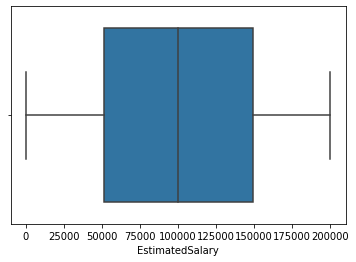

In [18]:
sns.boxplot(df.EstimatedSalary)

In [19]:
#Categorical columns and encoding
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Geography=le.fit_transform(df.Geography)
df.Gender=le.fit_transform(df.Gender)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
df.Geography.value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [23]:
#Dependant Independant variables split
y=df['CreditScore']
y

0       619
1       608
2       502
3       699
4       850
       ... 
9995    771
9996    516
9997    709
9998    772
9999    792
Name: CreditScore, Length: 10000, dtype: int64

In [24]:
X=df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [25]:
#Scaling the data
from sklearn.preprocessing import scale
xsc=pd.DataFrame(scale(X),columns=X.columns)
xsc

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,-0.901886,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165
1,-0.440036,1.515067,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775
2,-1.536794,-0.901886,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165
3,0.501521,-0.901886,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775
4,2.063884,1.515067,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,-0.505775
9996,-1.391939,-0.901886,0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.505775
9997,0.604988,-0.901886,-1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1.977165
9998,1.256835,0.306591,0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1.977165


In [27]:
#Test and Train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(xsc,y,test_size=0.3,random_state=0)
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7681,-0.098592,-0.901886,0.912419,-0.564665,-1.041760,1.117213,0.807737,0.646092,0.970243,-0.770218,1.977165
9031,-1.133270,-0.901886,0.912419,0.007457,0.687130,-1.225848,0.807737,0.646092,-1.030670,-1.395767,-0.505775
3691,-0.626278,-0.901886,-1.095988,3.535540,-0.004426,1.354191,-0.911583,-1.547768,0.970243,-1.499656,-0.505775
202,-1.391939,1.515067,0.912419,1.056346,-0.004426,-1.225848,-0.911583,-1.547768,0.970243,0.800862,1.977165
5625,-1.474714,-0.901886,-1.095988,2.009882,0.687130,1.070229,-0.911583,0.646092,0.970243,0.512497,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.584891,0.306591,-1.095988,-0.660018,-0.350204,0.698607,0.807737,0.646092,0.970243,1.093273,-0.505775
4859,1.484464,1.515067,-1.095988,-1.613554,-0.350204,0.608299,-0.911583,0.646092,0.970243,0.133249,-0.505775
3264,0.905045,-0.901886,0.912419,-0.373958,-0.004426,1.358909,0.807737,0.646092,-1.030670,1.414415,-0.505775
9845,-0.626278,1.515067,-1.095988,-0.087897,1.378686,-1.225848,0.807737,0.646092,0.970243,0.846147,-0.505775


In [28]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9394,-0.553850,0.306591,-1.095988,-0.373958,1.032908,0.875323,-0.911583,0.646092,0.970243,1.613046,-0.505775
898,-1.319512,-0.901886,-1.095988,0.102810,-1.041760,0.424422,-0.911583,0.646092,-1.030670,0.497532,1.977165
2398,0.573948,1.515067,-1.095988,0.293517,1.032908,0.302927,-0.911583,0.646092,0.970243,-0.423561,-0.505775
5906,1.422384,-0.901886,0.912419,-0.660018,-0.350204,0.570464,-0.911583,-1.547768,-1.030670,-0.186439,-0.505775
2343,0.573948,0.306591,0.912419,-0.087897,-0.004426,1.387129,0.807737,0.646092,0.970243,0.618560,-0.505775
...,...,...,...,...,...,...,...,...,...,...,...
4004,-1.247084,1.515067,-1.095988,0.198164,-0.350204,-1.225848,0.807737,-1.547768,0.970243,0.826264,-0.505775
7375,-0.119286,-0.901886,0.912419,3.630893,0.341352,0.071162,0.807737,0.646092,0.970243,-0.769654,-0.505775
9307,0.356666,-0.901886,0.912419,0.102810,-1.041760,1.466728,0.807737,0.646092,0.970243,1.170455,-0.505775
8394,0.429093,-0.901886,0.912419,2.868064,1.724464,1.257616,-0.911583,0.646092,0.970243,-0.508468,-0.505775


In [29]:
y_train

7681    641
9031    541
3691    590
202     516
5625    508
       ... 
9225    594
4859    794
3264    738
9845    590
2732    623
Name: CreditScore, Length: 7000, dtype: int64

In [30]:
y_test

9394    597
898     523
2398    706
5906    788
2343    706
       ... 
4004    530
7375    639
9307    685
8394    692
5233    731
Name: CreditScore, Length: 3000, dtype: int64